<a href="https://colab.research.google.com/github/silassanttos/Banco-de-Dados/blob/main/DTP_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import pandas.util.testing  as tm
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns #biblioteca para gráficos
import statsmodels.api as sm

In [7]:
 #Abrindo o arquivo de dados
dados_custoDiaria = pd.read_csv("custo_diaria.csv", sep=";").astype(int)

In [8]:
#Visualizando arquivos da base de dados
dados_custoDiaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             3           200
2             4           650
3             6           499
4             7           549
5            10           980
6            12           700
7            13           735
8            15           859
9            16           900
10           20          1100
11           18           989
12           22          1075
13           23          1378
14           25          1500
15           27          1755
16           30          1850
17           32          2500
18           33          2000
19           40          1900
20           42          2089
21           43          2500
22           45          2250
23           47          2488
24           50          2680
25           51          2803
26           52          2890
27           53          3040
28           58          3150
29           60          3300>

In [9]:
pd.DataFrame(dados_custoDiaria)

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549
5,10,980
6,12,700
7,13,735
8,15,859
9,16,900


In [10]:
#Estatisticas da base
dados_custoDiaria.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [11]:
#Criando variavel independente

X_custo_diaria = dados_custoDiaria.iloc[:,0].values #buscando todos os registros da primeira coluna e convertendo em formado de array
#O comando iloc permite selecionar um conjunto de registros. O dois pontos ":" significa que estamos selecionando todos os registros e zero "0" a primeira coluna.
X_custo_diaria


array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25, 27, 30,
       32, 33, 40, 42, 43, 45, 47, 50, 51, 52, 53, 58, 60])

In [12]:
#Criando variável dependente (o que queremos predizer)

Y_custo_diaria = dados_custoDiaria.iloc[:,1].values
Y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [13]:
np.corrcoef(X_custo_diaria,Y_custo_diaria) #Mostra uma matriz

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

# Correlação

Correlação positiva: Quando duas variáveis que possuem correlação crescem ou descrescem juntas, ou seja, que possuem uma relação direta;
Correlação negativa: Quando duas variáveis que possuem correlação mas quando uma variável cresce a outra descresce, ou vice-versa;
Não ter correlação: Quando o crescimetno ou descrescimento de uma variável não tem efeito sobre outra variável.

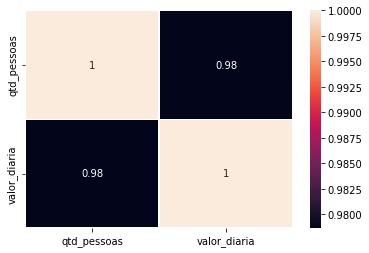

In [18]:
correlacao = dados_custoDiaria.corr()
# plot da matriz de correlação em formato de gráfico
plot = sns.heatmap(correlacao, annot = True, linewidths=.3)
plot

Perceba que temos uma correlação forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta. Além disso, podemos dizer que em 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.

Tratando os dados para o modelo